<a href="https://colab.research.google.com/github/ayan-biswas0412/sscs-ose-code-a-chip.github.io/blob/main/Notebooks/DFA_using_OpenLane/DFA_using_OpenLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **_Deterministic Finite Automata(DFA) using OpenLane_**<br/>
**_submission under category-1_**

```
Ayan Biswas, November 2022
SPDX-License-Identifier: Apache-2.0
```

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Ayan Biswas <br /> Email ID: ayanbiswas184@gmail.com |Jadavpur University|Yes|No|

**_Index Terms:_** Deterministic Finite Automata(DFA), Token Recognizer, Compiler Design, OpenLane

# **Introduction**

DFA refers to deterministic finite automata. Deterministic refers to the uniqueness of the computation. The finite automata are called deterministic finite automata if the machine reads an input string one symbol at a time. In DFA, there is only one path for specific input from the current state to the next state. DFA does not accept the null move, i.e., the DFA cannot change the state without any input character. DFA can contain multiple final states.

Here we will be designing a simple regex token recognizer for the following expression 

### `R = (a|b)*abb`

In simpler terms we can say that we have to design a token recognizer using DFA which can detect the above regex expression.

This notebook submission describes the design of above mentioned token recognizer. In the later part of this notebook the overall circuit has been implemented in VHDL and [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/) has been used for design exploration and optimization.





# **Design Flow**

The design flow is organized as follows:

*   State Machine Design.
*   Environment Setup.
*   Behavourial simulation using Verilog.
*   Run OpenLane Flow.
*   Layout Generation using OpenLane.

## **State Machine Design**

Deterministic Finite Automata (DFA) consists of 5 tuples {Q, Σ, q, F, δ}. 

The five tuples are describe as below,
* Q: a set of all states.
* Σ: a set of input symbols. ( Symbols that which machine takes as input )
* q: Initial state. ( Starting state of a machine )
* F: a set of the final state.
* δ: Transition Function, defined as δ: Q X Σ --> Q.

### **State diagram of DFA for the above regex**

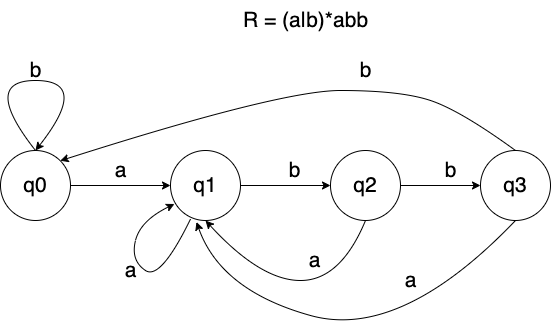

## **Environment Setup**

In [1]:
# Installing the dependencies
openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --quiet --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version}
!CI=0 bin/micromamba install --quiet --yes --prefix $CONDA_PREFIX \
                     --channel conda-forge \
                     gdstk

env: CONDA_PREFIX=/content/conda-env
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
env: LD_LIBRARY_PATH=/content/conda-env/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env
  Package                             Version  Build                 Channel                  Size
────────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex                       

In [11]:
!curl -L -O https://github.com/google/xls/archive/refs/heads/main.tar.gz
!tar --strip-components=1 -xvf main.tar.gz xls-main/xls/dslx/stdlib/ xls-main/xls/modules/
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.6M    0 15.6M    0     0  8693k      0 --:--:--  0:00:01 --:--:-- 8575k
xls-main/xls/dslx/stdlib/
xls-main/xls/dslx/stdlib/BUILD
xls-main/xls/dslx/stdlib/acm_random.x
xls-main/xls/dslx/stdlib/apfloat.x
xls-main/xls/dslx/stdlib/bfloat16.x
xls-main/xls/dslx/stdlib/float32.x
xls-main/xls/dslx/stdlib/float32_test.cc
xls-main/xls/dslx/stdlib/float64.x
xls-main/xls/dslx/stdlib/std.x
xls-main/xls/modules/
xls-main/xls/modules/aes/
xls-main/xls/modules/aes/BUILD
xls-main/xls/modules/aes/aes.x
xls-main/xls/modules/aes/aes_common.x
xls-main/xls/modules/aes/aes_ctr.x
xls-main/xls/modules/aes/aes_ctr_test.cc
xls-main/xls/modules/aes/aes_gcm.x
xls-main/xls/modules/aes/aes_gcm_test.cc
xls-main/xls/modules/aes/aes_test.cc
xls-main/xls/modules/aes/aes_test_commo

In [12]:
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1

Cloning into 'OpenLane'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 553 (delta 77), reused 318 (delta 27), pack-reused 0
Receiving objects: 100% (553/553), 9.77 MiB | 25.01 MiB/s, done.
Resolving deltas: 100% (77/77), done.
env: PDK_ROOT=/content/conda-env/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/content/conda-env/lib/tcllib1.20
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1


In [13]:
import pandas as pd
import pathlib
import gdstk
import IPython.display
from google.colab import files

## **Behavourial simulation using Verilog**

In [14]:
%%writefile DFA_module_state_machine.v
module DFA_module_state_machine(
    input clk,
    input rst,
    input en,
    input i,
    output reg q0,
    output reg q1,
    output reg q2,
    output reg q3
    );

    always @(posedge clk or posedge rst)
    begin
        if(rst)
        begin
            q0 <= 1'b1;
            q1 <= 1'b0;
            q2 <= 1'b0;
            q3 <= 1'b0;
        end
        else if(!en)
        begin
            q0 <= 1'b1;
            q1 <= 1'b0;
            q2 <= 1'b0;
            q3 <= 1'b0;
        end
        else
        begin
            case({q3,q2,q1,q0})
                4'b0000: begin
                    if(i == 1'b0)
                        q0 <= 1'b1;
                    else
                        q0 <= 1'b0;
                end
                4'b0001: begin
                    if(i == 1'b0)
                        q1 <= 1'b1;
                    else
                        q1 <= 1'b0;
                end
                4'b0010: begin
                    if(i == 1'b0)
                        q2 <= 1'b1;
                    else
                        q2 <= 1'b0;
                end
                4'b0011: begin
                    if(i == 1'b0)
                        q3 <= 1'b1;
                    else
                        q3 <= 1'b0;
                end
                4'b0100: begin
                    if(i == 1'b0)
                        q0 <= 1'b1;
                    else
                        q0 <= 1'b0;
                end
                4'b0101: begin
                    if(i == 1'b0)
                        q1 <= 1'b1;
                    else
                        q1 <= 1'b0;
                end
                4'b0110: begin
                    if(i == 1'b0)
                        q2 <= 1'b1;
                    else
                        q2 <= 1'b0;
                end
                4'b0111: begin
                    if(i == 1'b0)
                        q3 <= 1'b1;
                    else
                        q3 <= 1'b0;
                end
                4'b1000: begin
                    if(i == 1'b0)
                        q0 <= 1'b1;
                    else
                        q0 <= 1'b0;
                end
                4'b1001: begin
                    if(i == 1'b0)
                        q1 <= 1'b1;
                    else
                        q1 <= 1'b0;
                end
                4'b1010: begin
                    if(i == 1'b0)
                        q2 <= 1'b1;
                    else
                        q2 <= 1'b0;
                end
                4'b1011: begin
                    if(i == 1'b0)
                        q3 <= 1'b1;
                    else
                        q3 <= 1'b0;
                end
                4'b1100: begin
                    if(i == 1'b0)
                        q0 <= 1'b1;
                    else
                        q0 <= 1'b0;
                end
                4'b1101: begin
                    if(i == 1'b0)
                        q1 <= 1'b1;
                    else
                        q1 <= 1'b0;
                end
                4'b1110: begin
                    if(i == 1'b0)
                        q2 <= 1'b1;
                    else
                        q2 <= 1'b0;
                end
                4'b1111: begin
                    if(i == 1'b0)
                        q3 <= 1'b1;
                    else
                        q3 <= 1'b0;
                end
            endcase
        end
    end
endmodule

Overwriting DFA_module_state_machine.v


## **Run OpenLane Flow**

In [15]:
DESIGN = 'DFA_module_state_machine'
%env DESIGN={DESIGN}
DESIGN_FILES = 'DFA_module_state_machine.v'
%env DESIGN_FILES={DESIGN_FILES}

env: DESIGN=DFA_module_state_machine
env: DESIGN_FILES=DFA_module_state_machine.v


In [16]:
%%writefile config.tcl
set ::env(DESIGN_NAME) $::env(DESIGN)

set ::env(VERILOG_FILES) $::env(DESIGN_FILES)

set ::env(CLOCK_TREE_SYNTH) 1
set ::env(CLOCK_PORT) "clk"
set ::env(CLOCK_NET) "clk"
set ::env(CLOCK_PERIOD) "15"

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 500 500"
set ::env(PL_TARGET_DENSITY) 0.70


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Overwriting config.tcl


In [17]:
!flow.tcl -design . -ignore_mismatches

OpenLane 2022.11.12_3_g1298859-conda
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: not enough values to unpack (expected 3, got 1)
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 0059588eebfc704681dc2368bd1d33d96281d10f)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Ki

### View the implementation summary

In [23]:
MOST_RECENT_RUN_PATH = sorted(os.listdir('runs'))[-1]
print(MOST_RECENT_RUN_PATH)
pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

RUN_2022.11.23_11.02.58


,0
design,/content
design_name,DFA_module_state_machine
config,RUN_2022.11.23_11.02.58
flow_status,flow completed
total_runtime,0h2m28s0ms
routed_runtime,0h1m29s0ms
(Cell/mm^2)/Core_Util,168.0
DIEAREA_mm^2,0.25
CellPer_mm^2,84.0
OpenDP_Util,-1


Design area

In [24]:
!cat runs/{MOST_RECENT_RUN_PATH}/reports/signoff/25-rcx_sta.area.rpt


 report_design_area
Design area 4484 u^2 2% utilization.


## **Layout Generation using OpenLane**

In [10]:
gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('DFA_module_state_machine.svg')
IPython.display.SVG('DFA_module_state_machine.svg')

# **References**

1. M. Shalan and T. Edwards, "Building OpenLANE: A 130nm OpenROAD-based Tapeout- Proven Flow : Invited Paper," 2020 IEEE/ACM International Conference On Computer Aided Design (ICCAD), 2020, pp. 1-6.

2. Yamagaki, Norio & Sidhu, Reetinder & Kamiya, Satoshi. (2008). High-speed regular expression matching engine using multi-character NFA. 131 - 136. 10.1109/FPL.2008.4629920

3. Yin Chao, "A deterministic finite automata based on improved BM algorithm," 2010 International Conference On Computer Design and Applications, 2010, pp. V2-389-V2-391, doi: 10.1109/ICCDA.2010.5541401.

4. M. Chupilko, A. Kamkin and S. Smolov, "Survey of Open-source Flows for Digital Hardware Design," 2021 Ivannikov Memorial Workshop (IVMEM), 2021, pp. 11-16, doi: 10.1109/IVMEM53963.2021.00008.